In [1]:
sample_name = 'azog_c1'                    # name of the chip in the fridge

<h3>Basic imports and database loading</h3>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.stats

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
db_name = '20220203_ncr_frequency_dependance_v1.db'  
db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\',db_name)

qc.initialise_or_create_database_at(db_path)

<h2>Data analysis and plotting</h2>

<h4>First four steps as a function of the tone power</h4>

In [43]:
# loading

# loading vna data

# RUN_ID = 27
RUN_ID = 30
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
vnadc_dc_dict = dataset.to_pandas_dataframe_dict()

# RUN_ID = 22
RUN_ID = 37
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
vnadc_vna_dict = dataset.to_pandas_dataframe_dict()

In [44]:
# IV curve
vnadc_dc_up_0 = vnadc_dc_dict['adwin_up_ramp']
vnadc_dc_up_1 = vnadc_dc_up_0.reset_index()
v_up = vnadc_dc_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = vnadc_dc_up_1['adwin_up_ramp'].to_numpy()

# down ramp
vnadc_dc_down_0 = vnadc_dc_dict['adwin_down_ramp']
vnadc_dc_down_1 = vnadc_dc_down_0.reset_index()
v_down = vnadc_dc_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = vnadc_dc_down_1['adwin_down_ramp'].to_numpy()

# # divide into low-to-high and high-to-low
# N = len(v_up)
# zero_index_up = np.argmin(np.abs(i_up))
# zero_index_down = np.argmin(np.abs(i_down))

# v_dc_lh = np.concatenate(( np.flip(v_down[zero_index_down:]), v_up[zero_index_up:] ))
# i_dc_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
# v_dc_hl = np.concatenate(( v_up[:zero_index_up], np.flip(v_down[:zero_index_down]) ))
# i_dc_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))

# VNA spectra
vnadc_vna_0 = vnadc_vna_dict['ZNB20_S21_magnitude']
vnadc_vna_1 = vnadc_vna_0.reset_index()

frq = vnadc_vna_1['ZNB20_S21_S21_frequency'].to_numpy()
v_bias = vnadc_vna_1['adwin_output1'].to_numpy()
mag = vnadc_vna_1['ZNB20_S21_magnitude'].to_numpy()

m_size = (-1, np.unique(frq).size)
frq = np.reshape(frq, m_size)
v_bias = np.reshape(v_bias, m_size)
mag = np.reshape(mag, m_size)

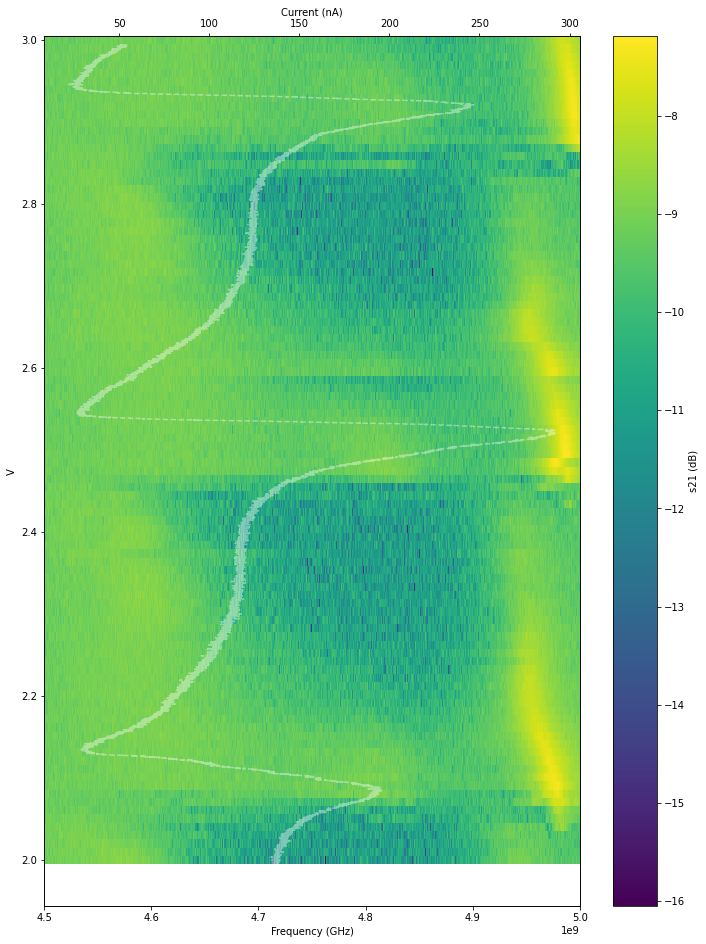

In [45]:
fig, ax1 = plt.subplots(figsize=(12,16))
voltage_scaling = 1e3
voltage_offset = 0.05
current_scaling = 1e9

ctf = ax1.pcolormesh(frq, v_bias, np.log(mag), shading='nearest')
fig.colorbar(ctf, label='s21 (dB)')
ax1.set_ylabel('V')
ax1.set_xlabel('Frequency (GHz)')
# ax1.set_ylim([0,5])
# ax1.set_ylim([-10,0])

ax2 =ax1.twiny()
ax2.plot(current_scaling*np.abs(i_up), v_up, 'w--', alpha=0.4)
ax2.set_xlabel('Current (nA)');
plt.savefig("small_VNA_zoom_steps_f475.png")

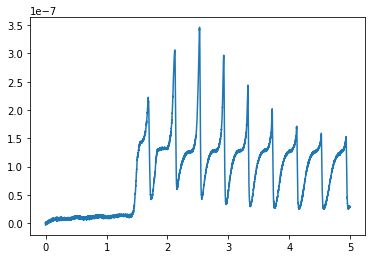

In [13]:
plt.plot(v_up, i_up)

In [40]:
# loading

# loading vna data

RUN_ID = 28
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
vnadc_dc_dict = dataset.to_pandas_dataframe_dict()

# Loading ADwin data
# RUN_ID = 32
RUN_ID = 23
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
vnadc_vna_dict = dataset.to_pandas_dataframe_dict()

In [41]:
# IV curve
vnadc_dc_up_0 = vnadc_dc_dict['adwin_up_ramp']
vnadc_dc_up_1 = vnadc_dc_up_0.reset_index()
v_up = vnadc_dc_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = vnadc_dc_up_1['adwin_up_ramp'].to_numpy()

# down ramp
vnadc_dc_down_0 = vnadc_dc_dict['adwin_down_ramp']
vnadc_dc_down_1 = vnadc_dc_down_0.reset_index()
v_down = vnadc_dc_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = vnadc_dc_down_1['adwin_down_ramp'].to_numpy()

# # divide into low-to-high and high-to-low
# N = len(v_up)
# zero_index_up = np.argmin(np.abs(i_up))
# zero_index_down = np.argmin(np.abs(i_down))

# v_dc_lh = np.concatenate(( np.flip(v_down[zero_index_down:]), v_up[zero_index_up:] ))
# i_dc_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
# v_dc_hl = np.concatenate(( v_up[:zero_index_up], np.flip(v_down[:zero_index_down]) ))
# i_dc_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))

# VNA spectra
vnadc_vna_0 = vnadc_vna_dict['ZNB20_S21_magnitude']
vnadc_vna_1 = vnadc_vna_0.reset_index()

frq = vnadc_vna_1['ZNB20_S21_S21_frequency'].to_numpy()
v_bias = vnadc_vna_1['adwin_output1'].to_numpy()
mag = vnadc_vna_1['ZNB20_S21_magnitude'].to_numpy()

m_size = (-1, np.unique(frq).size)
frq = np.reshape(frq, m_size)
v_bias = np.reshape(v_bias, m_size)
mag = np.reshape(mag, m_size)

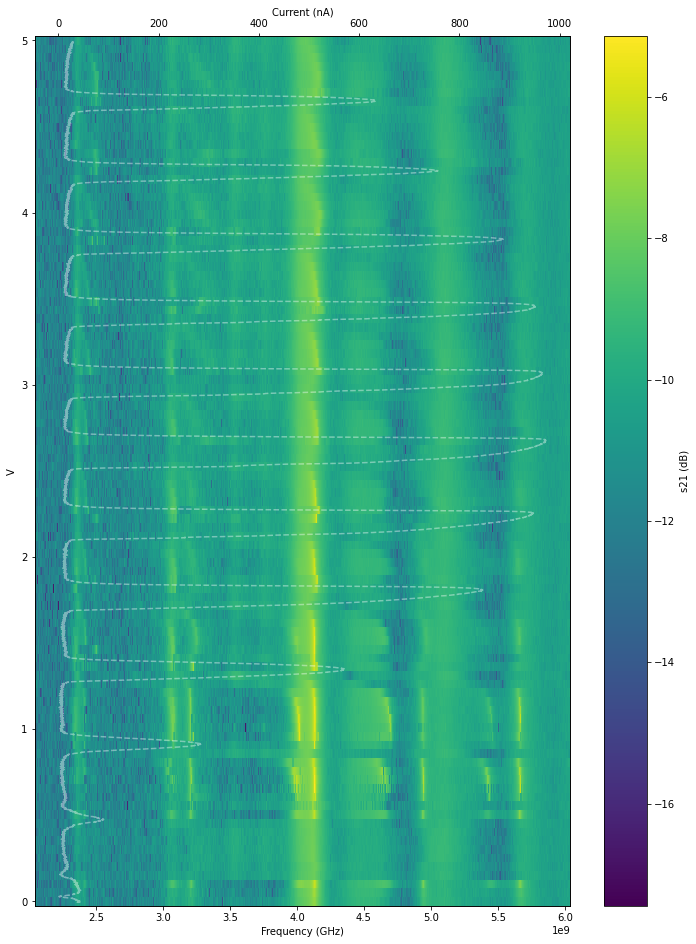

In [42]:
fig, ax1 = plt.subplots(figsize=(12,16))
voltage_scaling = 1e3
voltage_offset = 0.05
current_scaling = 1e9

ctf = ax1.pcolormesh(frq, v_bias, np.log(mag), shading='nearest')
fig.colorbar(ctf, label='s21 (dB)')
ax1.set_ylabel('V')
ax1.set_xlabel('Frequency (GHz)')
# ax1.set_ylim([0,5])
# ax1.set_ylim([-10,0])

ax2 =ax1.twiny()
ax2.plot(current_scaling*np.abs(i_up), v_up, 'w--', alpha=0.4)
ax2.set_xlabel('Current (nA)');

In [46]:
db_name = '20220203_ncr_spectrumanalyzer_BO_v1.db'  
db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\',db_name)

qc.initialise_or_create_database_at(db_path)

<h2>Data analysis and plotting</h2>

<h4>First four steps as a function of the tone power</h4>

In [124]:
# loading

# loading vna data

# RUN_ID = 27
RUN_ID = 19
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
sh_dict = dataset.to_pandas_dataframe_dict()

In [125]:
sspec_0V = sh_dict['signal_hound2_trace'].reset_index()
pwr_0V = sspec_0V['signal_hound2_trace'].to_numpy()
freq_0V =  sspec_0V['signal_hound2_frequency'].to_numpy()
dc_current = sspec_0V['adwin_output1'].to_numpy()



m_size =  np.unique(dc_current).size
nn = pwr_0V.size // m_size
pwrl = []
frel = []
currentl = []
for k in range(m_size-1):
    
    pwrl.append(pwr_0V[k*nn: k*nn + nn])
    frel.append(freq_0V[k*nn: k*nn + nn])
    currentl.append(dc_current[k*nn: k*nn + nn])
    

pwr_0V = np.array(pwrl)
freq_0V = np.array(frel)
dc_current = np.array(currentl)
# freq_0V = np.reshape(freq_0V, m_size)
# dc_current = np.reshape(dc_current, m_size)

In [126]:
163924 / 63

2601.968253968254

In [127]:
f_normalized = []
f_mean = np.mean(freq_0V, axis = 1)
for i in range(freq_0V.shape[0]):
    f_normalized.append(freq_0V[i, :] - f_mean[i])
f_normalized=np.array(f_normalized)

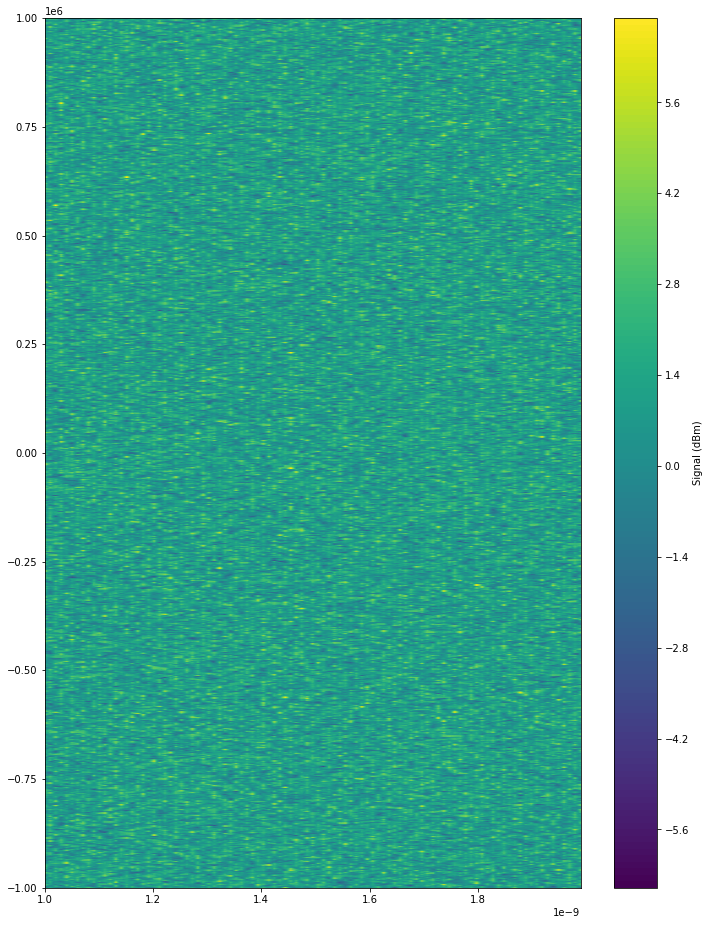

In [128]:


fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.contourf(dc_current, f_normalized , pwr_0V, levels=150)
fig.colorbar(ctf, label='Signal (dBm)')

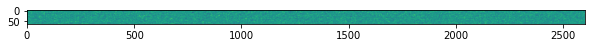

In [89]:
plt.figure(figsize=(10,10))
plt.imshow(pwr_0V)

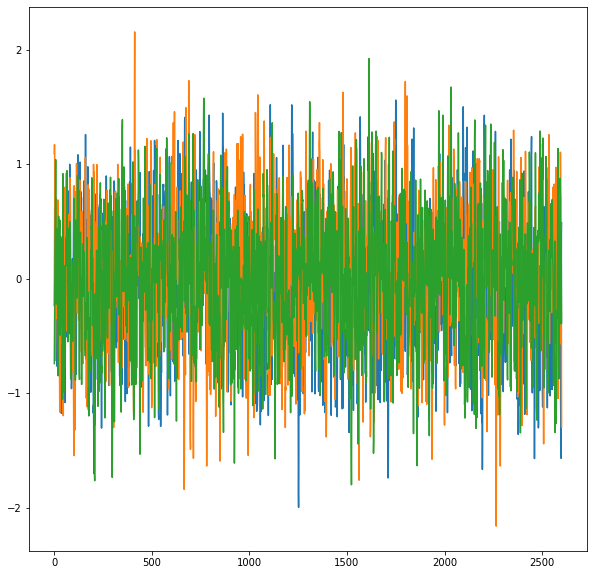

In [83]:

plt.figure(figsize=(10,10))
nn = len(pwr_0V) //44

k0 = 20
for k in range(k0, k0+3):
    plt.plot(pwr_0V[k*nn: k*nn + nn])